In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

1. import numpy as np
- This imports the NumPy library, which provides support for large, multi-dimensional arrays, and matrices in Python.

2. import matplotlib.pyplot as plt
- This imports the Matplotlib library, specifically the pyplot module, which provides a MATLAB-like interface for creating static, interactive, and animated plots and visualizations in Python.

3. from scipy import stats
- This imports the stats module from the SciPy library, which is used for scientific and technical computing.

4. import seaborn as sns
- This imports the Seaborn library, which is built on top of Matplotlib and provides a high-level interface for creating attractive and informative statistical graphics.

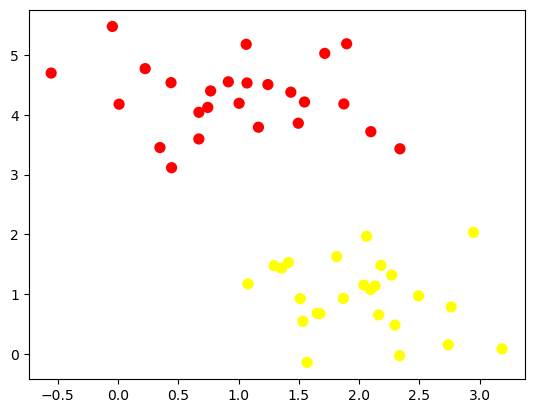

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

1. from sklearn.datasets import make_blobs
- The make_blobs function is used to generate synthetic clusters of points for clustering and classification tasks.

2. X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
- This line generates synthetic data using the make_blobs function.

3. n_samples=50
- This specifies the total number of samples to generate.

4. centers=2
- This specifies the number of centers (clusters) to generate.

5. random_state=0
- This sets the random seed for reproducibility. Setting a random seed ensures that every time you run the code, you get the same random data.

6. cluster_std=0.60
- This sets the standard deviation of the clusters. Larger values spread out the clusters more.

7. plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
- This line creates a scatter plot using Matplotlib.

8. When it's run, it generates synthetic data with two clusters and plots it as a scatter plot, where points belonging to different clusters are visually distinguishable by their colors. This is often used as a simple example for understanding basic concepts in classification algorithms.

(-1.0, 3.5)

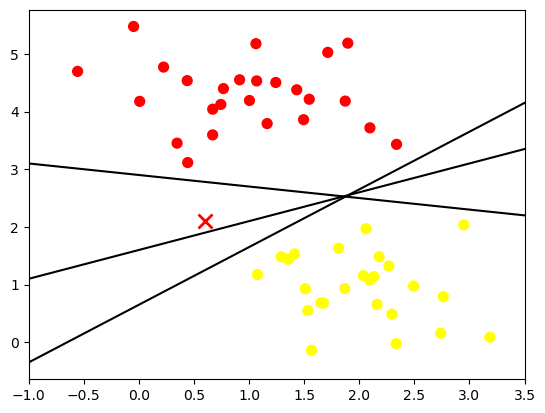

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

Create a scatter plot of the data points, plot a red 'x' marker at the specified point, and draw three lines on the plot based on the provided slope-intercept values. This is a visual representation often used to illustrate how a classifier (or a regression model) separates classes in a binary classification problem. The lines represent the decision boundaries between the classes.

(-1.0, 3.5)

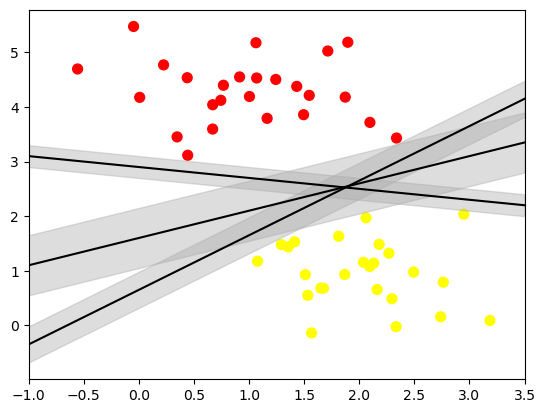

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

Create a scatter plot of the data points, plot three lines, and shade the regions around the lines. The shaded regions represent the margins around the decision boundaries, showing the regions where a new data point would be classified as a particular class. This visualization is commonly used in support vector machine (SVM) classifiers to illustrate the margins around the separating hyperplanes.

Penerapan Fitting SVM

In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

The model object will be trained and can be used to make predictions on new, unseen data points. The model will have learned a decision boundary (a hyperplane in this case) that best separates the classes in the input data based on the linear kernel and the specified regularization parameter C.

In [20]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

This function allows us to visualize the decision boundary and margins of an SVM classifier along with its support vectors. It's a useful tool for understanding how the classifier separates different classes in the feature space.

In [21]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.26604148, 2.71915015],
       [1.34880003, 3.07479238],
       [1.88779063, 3.31592667],
       [0.13742771, 3.16777298],
       [2.79207378, 3.14029479],
       [2.48279064, 3.22558008],
       [2.47031647, 3.52196502],
       [1.66781904, 3.71005531],
       [0.32575305, 2.92276125],
       [0.56762597, 3.35928158],
       [3.59362114, 2.08207549],
       [1.46361712, 2.13207534],
       [2.29385806, 1.95877238],
       [1.70714468, 2.37707464],
       [2.00067424, 2.26833784],
       [1.1167688 , 2.45256061],
       [1.65684156, 2.4412893 ],
       [1.36628697, 2.42571562],
       [1.32500974, 1.79127669],
       [1.07491911, 1.57315404]])

The support_vectors_ attribute contains the feature vectors of the data points that are the support vectors for the SVM model. These are the data points that lie on the margins or are misclassified, and they play a crucial role in defining the decision boundary of the SVM.

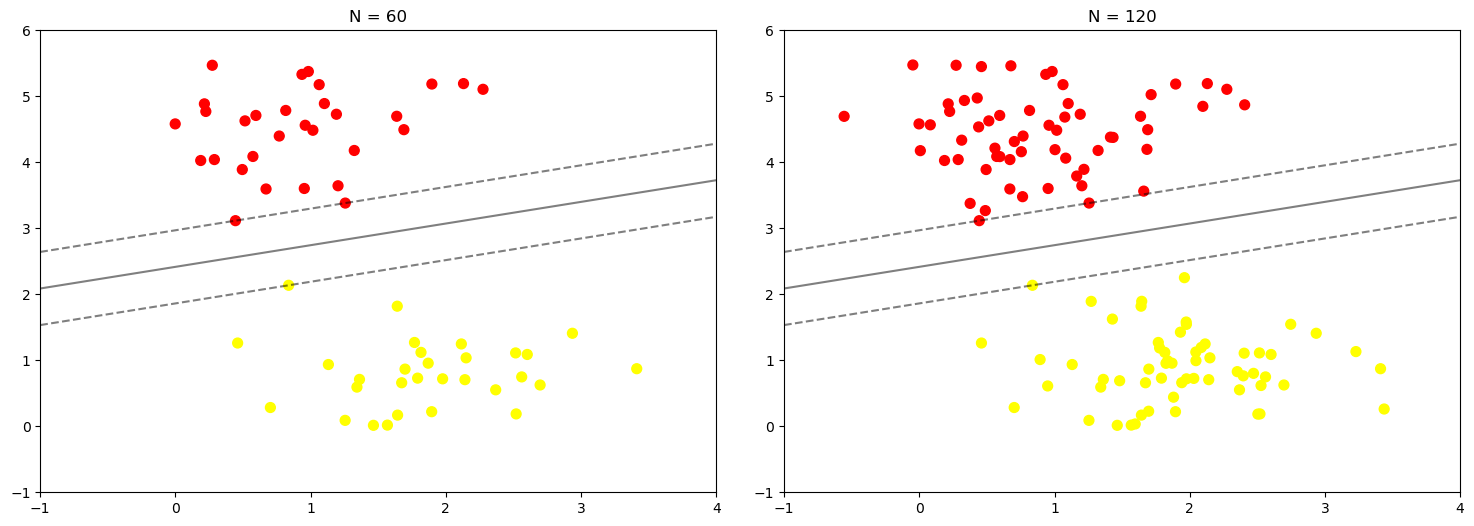

In [22]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

Create a figure with two subplots, each showing the SVM decision boundary and margins for a different number of data points (60 and 120) from the synthetic dataset. The decision boundary and margins are calculated based on the subset of the data specified by N.

Data Tidak Terpisah Secara Linier

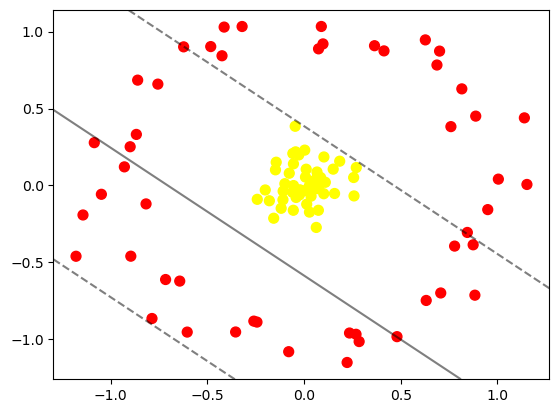

In [11]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

It will generate a plot showing the non-linear dataset as well as the linear decision boundary of the SVM classifier. In this case, a linear kernel is not suitable for separating the data points, as they are not linearly separable. The decision boundary will not accurately capture the underlying circular pattern of the data.

In [12]:
r = np.exp(-(X ** 2).sum(1))

This line of code calculates the radial distance from the origin (0,0) for each point in the dataset X. It's a common technique used in machine learning to transform data points from the original feature space into a higher-dimensional space where they might be linearly separable.

In [25]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20, 10], azip=(-180, 180),
        X=fixed(X), y=fixed(y))

NameError: name 'interact' is not defined

It will create an interactive 3D plot where you can adjust the viewing angles using sliders. The plot displays the 3D points with their radial distances r as the z-coordinate, and the points are color-coded based on their labels y. Users can dynamically change the plot's perspective by adjusting the elevation and azimuth angles.

In [16]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

 The clf object will be trained with the RBF kernel and can be used to make predictions on new, unseen data points. The RBF kernel allows the SVM to capture complex, non-linear patterns in the data, making it a powerful tool for classification tasks where the relationship between features and labels is not linear.

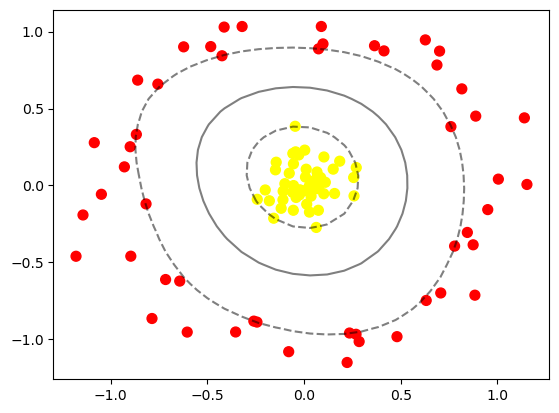

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

It will get a scatter plot of the original data points with their labels, the decision boundary, and margins defined by the trained SVM classifier, and the support vectors highlighted as large markers. This visualization helps you understand how the SVM has learned to separate the classes in the 2D feature space using the non-linear RBF kernel.

Data Overlap

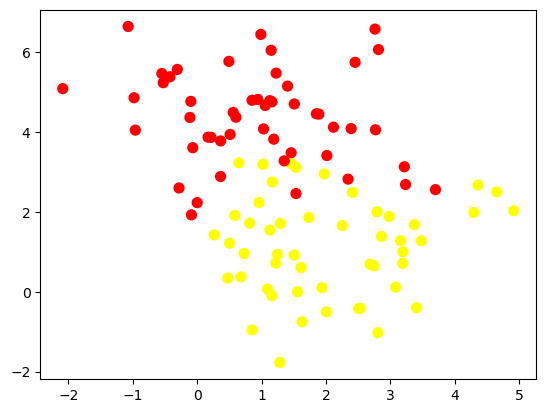

In [18]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

It will get a scatter plot displaying two distinct clusters of points, each belonging to one of the two classes. This dataset is suitable for binary classification algorithms, such as Support Vector Machines (SVMs), Logistic Regression, or Decision Trees, to learn and separate the clusters based on their features.

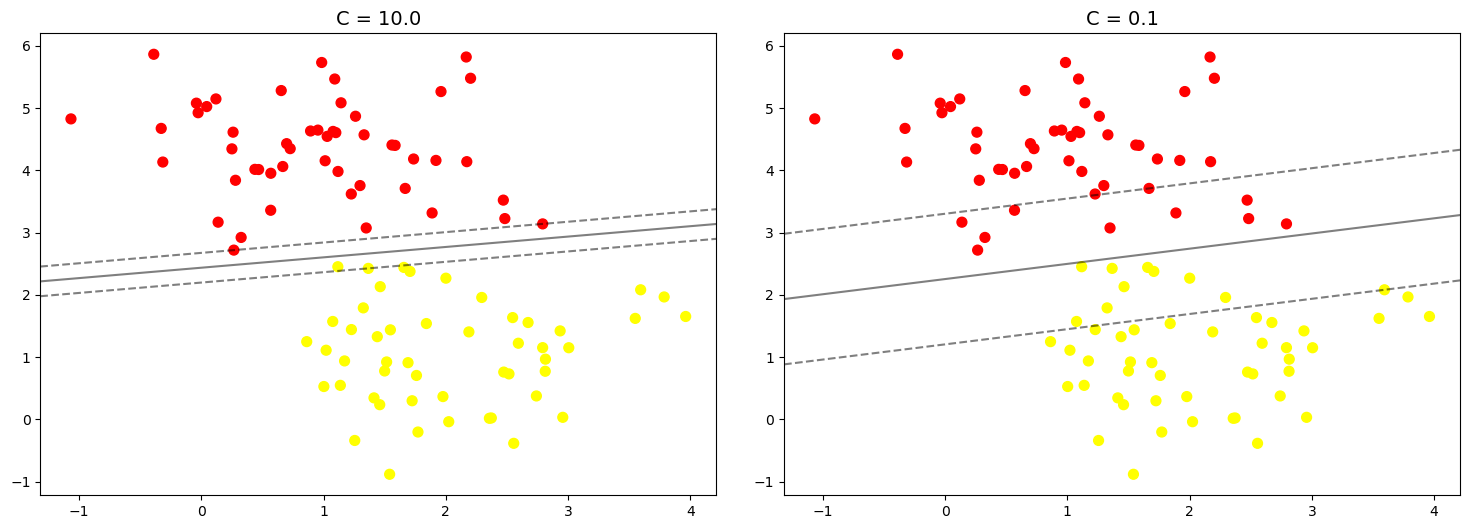

In [19]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

It will get two subplots side by side. Each subplot shows the data points, the decision boundary (a straight line in this case because of the linear kernel), the margins, and the support vectors. The left subplot corresponds to C=10.0, which imposes a stricter penalty for misclassification, leading to a narrower margin. The right subplot corresponds to C=0.1, allowing for a wider margin by allowing more misclassifications. This demonstrates the effect of the regularization parameter C on the decision boundaries of the SVM classifier.